In [2]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

from lightgbm import LGBMClassifier
from imblearn.under_sampling import RandomUnderSampler
from lightgbm import early_stopping

In [3]:
train = pd.read_csv('train_df.csv')
test = pd.read_csv('test_df.csv')

#check unique values later 
train['body_system_2'] = train['body_system_2'].replace('Undefined Diagnoses', 'Undefined diagnoses')
test['body_system_2'] = test['body_system_2'].replace('Undefined Diagnoses', 'Undefined diagnoses')

In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51359 entries, 0 to 51358
Data columns (total 85 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51359 non-null  int64  
 1   personal_id_1         51359 non-null  int64  
 2   personal_id_2         51359 non-null  int64  
 3   facility_id           51359 non-null  int64  
 4   age                   48987 non-null  float64
 5   bmi                   49490 non-null  float64
 6   situation_1           51359 non-null  int64  
 7   situation_2           50959 non-null  float64
 8   ethnicity             50550 non-null  object 
 9   gender                51346 non-null  object 
 10  height                50645 non-null  float64
 11  weight                49880 non-null  float64
 12  icu_id                51359 non-null  int64  
 13  icu_1                 51299 non-null  object 
 14  icu_2                 51359 non-null  object 
 15  icu_3              

In [12]:



train_na = (train.isnull().sum() / len(train)) * 100
# drop isnull = zero
train_na = train_na.drop(
    train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': train_na})
missing_data.head(20)


,Missing Ratio
x4,10.486964
x3,10.486964
w9,9.945677
w10,9.945677
x6,8.752117
x5,8.752117
w4,8.045328
w3,8.045328
w17,8.031698
w18,8.031698


In [13]:
test_na = (test.isnull().sum() / len(test)) * 100
# drop isnull = zero
test_na = test_na.drop(
    test_na[test_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': test_na})
missing_data.head(20)


,Missing Ratio
target_label,100.000000
x4,10.521807
x3,10.521807
w10,9.719626
w9,9.719626
x6,8.582555
x5,8.582555
w3,7.881620
w18,7.881620
w17,7.881620


In [ ]:
# Handle Missing data


train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)


In [8]:

numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Numerical: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Categorical: ", len(categorical_feats))


Numerical:  78
Categorical:  7


In [14]:
from sklearn.preprocessing import LabelEncoder


def encode_label(df, i):
    print(i, df[i].nunique())
    df[i] = df[i].fillna("None")
    lbl = LabelEncoder()
    lbl.fit(list(df[i].values))
    df[i] = lbl.transform(list(df[i].values))
    return df


l = len(train)
df = pd.concat([train, test])
for col in categorical_feats:
    df = encode_label(df, col)
train = df[:l]
test = df[l:]


ethnicity 7
gender 3
icu_1 6
icu_2 3
icu_3 8
body_system_1 12
body_system_2 10


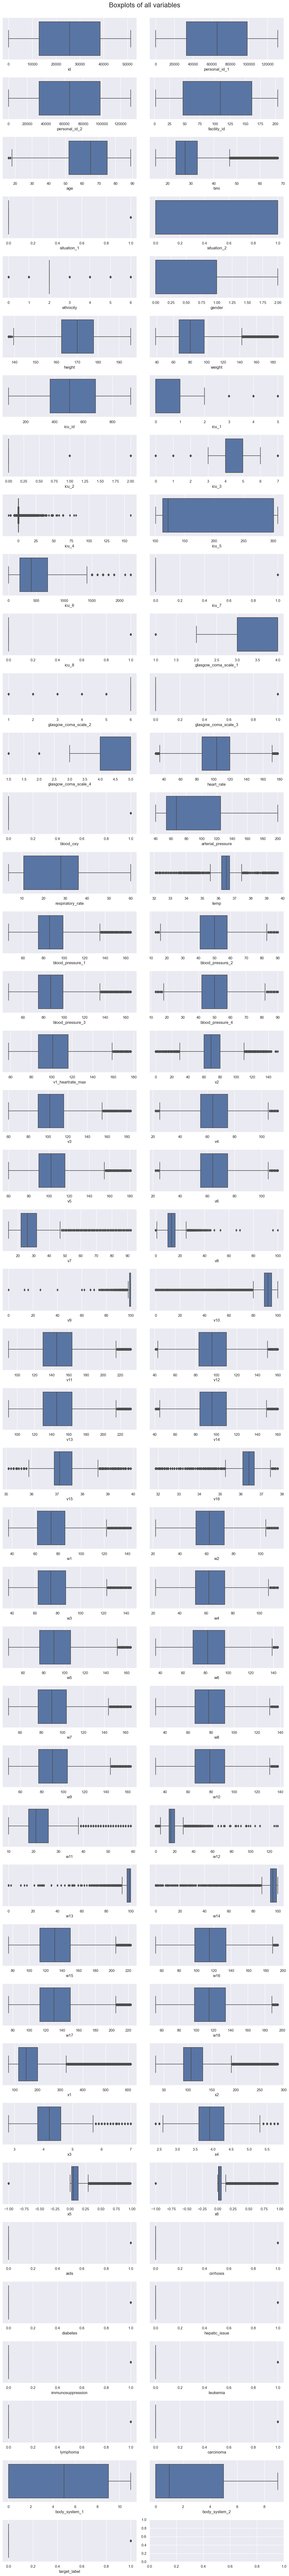

In [25]:
import numpy as np


ncols = 2
nrows = np.ceil(len(train.columns) / ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, nrows * 2.5))

for c, ax in zip(train.columns, axs.flatten()):
    # Modify the line below to create boxplots instead of histograms
    sns.boxplot(data=train, x=c, ax=ax)

fig.suptitle('Boxplots of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
